# Machine Learning and Regression Analysis
## 1. Import Libraries
## 2. Data prep for regression analysis
## 3. Regression Analysis

### 1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#define path
path = r'/Users/mindydong/Documents/School/Data Analyst/Achievement 6 /Medicare QPP/'

In [3]:
#import data
qpp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'state_agg.pkl'))

### Extreme values check

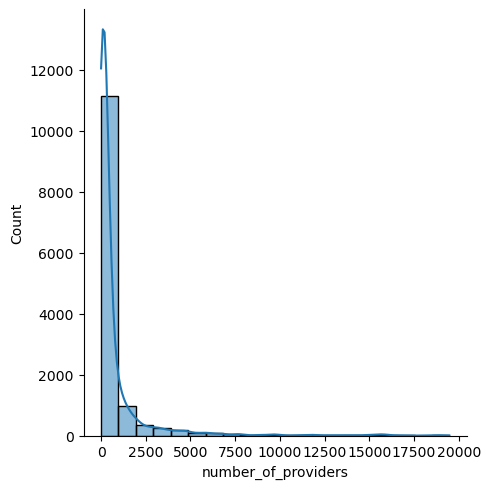

In [13]:
#create histogram for number of providers
sns.displot(qpp['number_of_providers'], bins=20, kde = True) 

In [14]:
qpp['number_of_providers'].mean()

711.2088028435302

In [15]:
qpp['number_of_providers'].median()

166.0

In [16]:
qpp['number_of_providers'].min()

0.0

In [17]:
qpp['number_of_providers'].max()

19475.0

Hypothesis to test:  If an area has more users, then it should also have more providers.

### 2. Data prep for regression analysis

Text(0, 0.5, 'Number of providers')

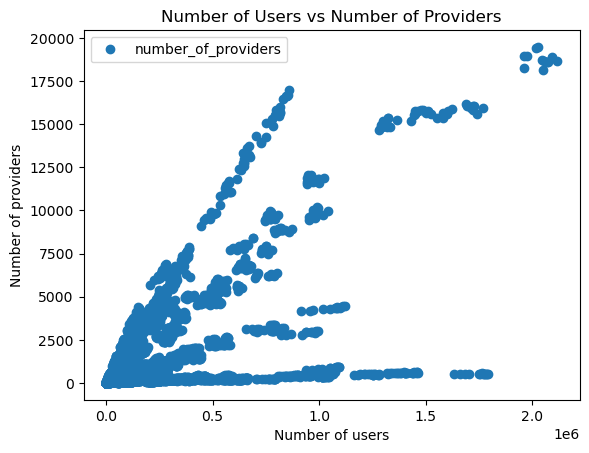

In [18]:
#create scatterplot to look at the relationship between the chosen variables
qpp.plot(x = 'number_of_users', y = 'number_of_providers', style = 'o')
plt.title('Number of Users vs Number of Providers')
plt.xlabel('Number of users')
plt.ylabel('Number of providers')

In [20]:
#reshape the variables
X = qpp['number_of_users'].values.reshape(-1,1)
y = qpp['number_of_providers'].values.reshape(-1,1)

In [21]:
X

array([[73215.],
       [ 8414.],
       [68228.],
       ...,
       [12511.],
       [11737.],
       [ 3228.]])

In [22]:
y

array([[146.],
       [ 33.],
       [170.],
       ...,
       [167.],
       [134.],
       [ 32.]])

In [23]:
#split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression Analysis

In [26]:
#create regression object
regression = LinearRegression()

In [27]:
#fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
#predict the values of y using x
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Number of providers')

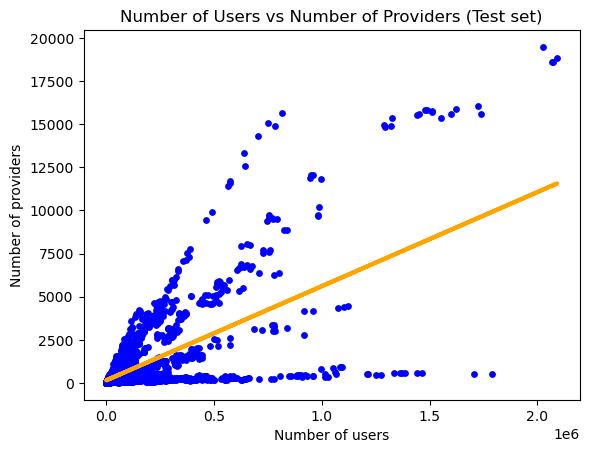

In [30]:
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s=15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Number of Users vs Number of Providers (Test set)')
plot_test.xlabel('Number of users')
plot_test.ylabel('Number of providers')

In [31]:
#create objects that contain the model and summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [32]:
#print model summary statistics
print('Slope:',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0054545]]
Mean squared error:  1579547.579016957
R2 score:  0.4777460822165991


In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,275.0,236.098787
1,135.0,275.780307
2,299.0,239.213309
3,66.0,429.935511
4,238.0,1766.049100
5,44.0,180.822839
6,471.0,223.378882
7,221.0,1596.343104
8,103.0,357.494238
9,196.0,1298.368981


In [34]:
#predict
y_predicted_train = regression.predict(X_train)

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0054545]]
Mean squared error:  1876954.217531414
R2 score:  0.4061726583737696


Text(0, 0.5, 'Number of providers')

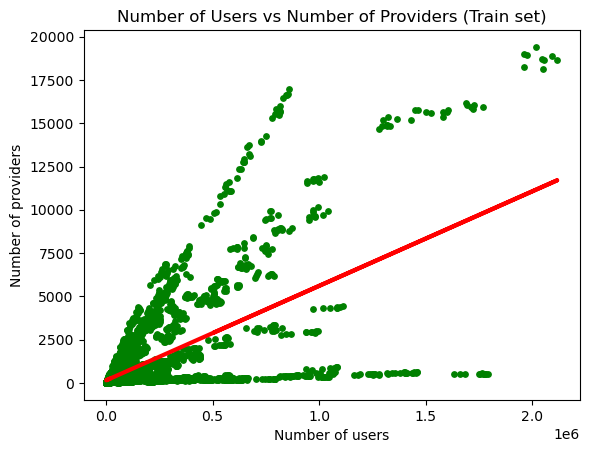

In [37]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Users vs Number of Providers (Train set)')
plot_test.xlabel('Number of users')
plot_test.ylabel('Number of providers')

There are significant outliers within the data, which makes regression analysis a slightly poor choice. The model did slightly worse than the test set based on the R2 value (model was .47 and test was .41). As far as bias, I did not retrain the model with outliers removed due to the fact that this dataset encompasses all payments from every type of service/provider. I felt that removing those values would introduce bias. With that being said, perhaps separating by type of service would be more beneficial or looking speficially at payments to areas with zero provders vs nonzero.

For the next analysis, I would like to explore the relationship between number of providers vs total payment as well as how/if type of service affects payment.